## Imports

In [2]:
import itertools
import os
import sys
import pickle

sys.path.append("./ml-fastvit")

import timm
import torch
import torch.optim as optim
import torchvision.utils as vutils
import torchvision.transforms as T
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np
import gc

from torch import Tensor
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.init as init
from PIL import Image

from Autoencoder import Autoencoder
from anomaly_detection_utils import (
    plot_images_vs_reconstructed_images,
    compute_loss_on_dataloader,
)

gc.collect()
torch.cuda.empty_cache()

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Reconstruction Results Avenue Dataset

In [ ]:
# Avenue Autoencoder Model
autoencoder_path = "autoencoder_t12_decoder_yolov8_2_adamw_numheads_8_ffdim_1024_numblocks_2_epoch_17_mseloss_0.0025767571664901574.pth"
autoencoder = Autoencoder(autoencoder_path).to(device)
autoencoder.eval()

In [15]:
DATASET_NAME = "AVENUE"
DATASET_TRAIN_PATH = "./datasets/Avenue Dataset/objects/train/"
DATASET_TEST_PATH = "./datasets/Avenue Dataset/objects/test/"
TRAIN_BATCH_SIZE = 64
TEST_BATCH_SIZE = 64

transform = T.Compose([T.Resize((64, 64)), T.ToTensor(), T.Normalize(0.5, 0.5)])
train_dataset = datasets.ImageFolder(root=DATASET_TRAIN_PATH, transform=transform)
train_loader = DataLoader(
    train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=2
)
print(train_dataset)

test_dataset = datasets.ImageFolder(root=DATASET_TEST_PATH, transform=transform)
test_loader = DataLoader(
    test_dataset, batch_size=TEST_BATCH_SIZE, shuffle=True, num_workers=2
)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 127194
    Root location: ./datasets/Avenue Dataset/objects/train/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset ImageFolder
    Number of datapoints: 118881
    Root location: ./datasets/Avenue Dataset/objects/test/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


### Reconstructions on Train Set

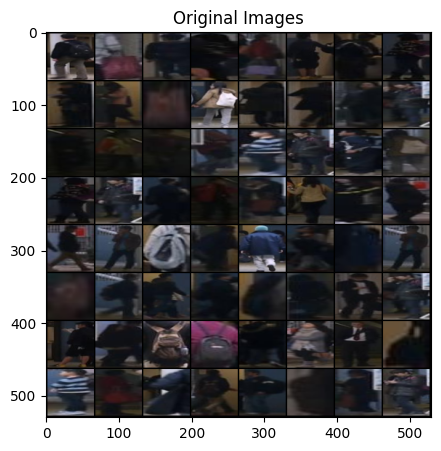

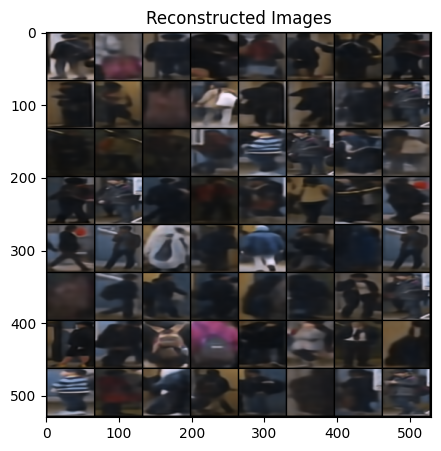

In [12]:
# Get a batch of images from your dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed_imgs = autoencoder(images)

plot_images_vs_reconstructed_images(images, reconstructed_imgs)

In [14]:
train_loss = compute_loss_on_dataloader(autoencoder, train_loader, device)
print(f"Train Loss: {train_loss}")

Train Loss: 0.0024986515438040788


### Reconstructions on Test Set

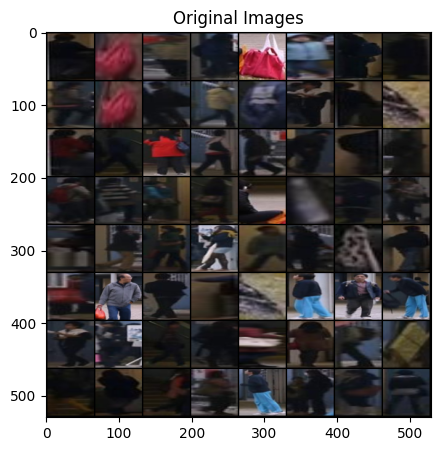

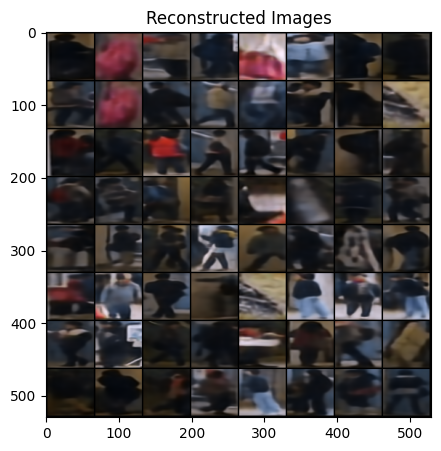

In [17]:
# Get a batch of images from your dataloader
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed_imgs = autoencoder(images)

plot_images_vs_reconstructed_images(images, reconstructed_imgs)

In [18]:
test_loss = compute_loss_on_dataloader(autoencoder, test_loader, device)
print(f"Test Loss: {test_loss}")

Train Loss: 0.006874128288676636


## Reconstruction Results on ShanghaiTech

In [ ]:
autoencoder_path = "shanghaitech_autoencoder_t12_decoder_yolov8_2_adamw_numheads_8_ffdim_2048_numblocks_2_epoch_20_mseloss_0.0023662329358668144.pth"
autoencoder = Autoencoder(autoencoder_path, ff_dim=2048).to(device)
autoencoder.eval()

In [4]:
DATASET_NAME = "SHANGHAITECH"
DATASET_TRAIN_PATH = "./datasets/shanghaitech/objects/train"
DATASET_TEST_PATH = "./datasets/shanghaitech/objects/test"
TRAIN_BATCH_SIZE = 64
TEST_BATCH_SIZE = 64

transform = T.Compose([T.Resize((64, 64)), T.ToTensor(), T.Normalize(0.5, 0.5)])
train_dataset = datasets.ImageFolder(root=DATASET_TRAIN_PATH, transform=transform)
train_loader = DataLoader(
    train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=2
)
print(train_dataset)

test_dataset = datasets.ImageFolder(root=DATASET_TEST_PATH, transform=transform)
test_loader = DataLoader(
    test_dataset, batch_size=TEST_BATCH_SIZE, shuffle=True, num_workers=2
)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 956976
    Root location: ./datasets/shanghaitech/objects/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset ImageFolder
    Number of datapoints: 179320
    Root location: ./datasets/shanghaitech/objects/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


### Reconstructions on Train Set

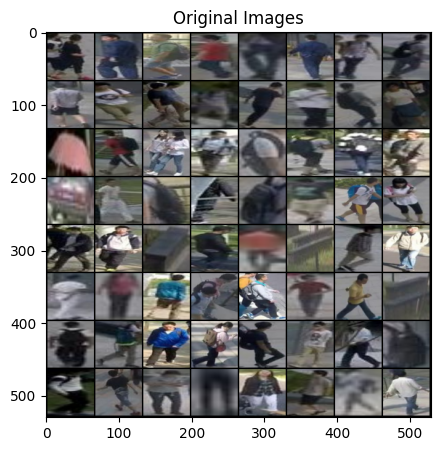

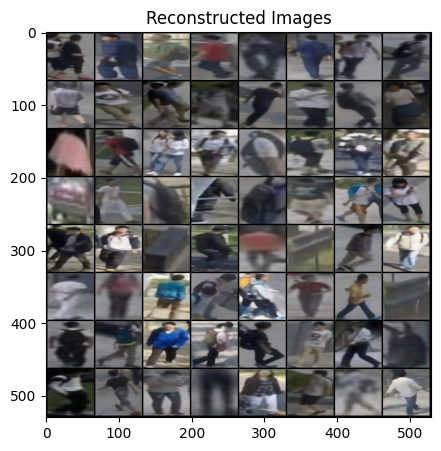

In [5]:
# Get a batch of images from your dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed_imgs = autoencoder(images)

plot_images_vs_reconstructed_images(images, reconstructed_imgs)

In [6]:
train_loss = compute_loss_on_dataloader(autoencoder, train_loader, device)
print(f"Train Loss: {train_loss}")

Train Loss: 0.0029911457713301492


### Reconstruction on Test Set

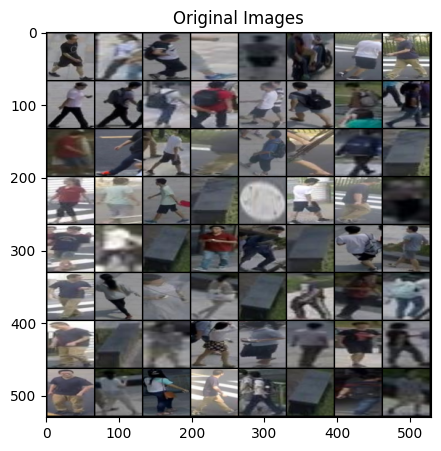

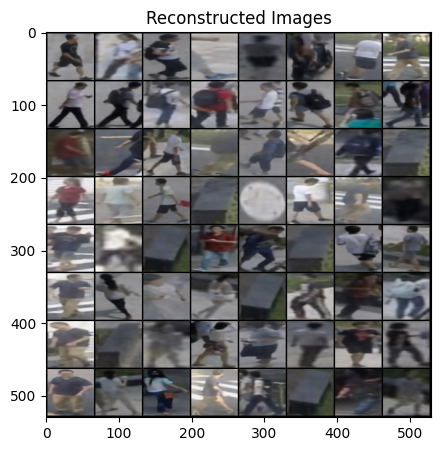

In [7]:
# Get a batch of images from your dataloader
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed_imgs = autoencoder(images)

plot_images_vs_reconstructed_images(images, reconstructed_imgs)

In [8]:
test_loss = compute_loss_on_dataloader(autoencoder, test_loader, device)
print(f"Train Loss: {test_loss}")

Train Loss: 0.0025115321868290057


## Reconstruction Results on UBNormal

In [ ]:
autoencoder_path = "ubnormal_autoencoder_t12_decoder_yolov8_adamw_numheads_8_ffdim_2048_numblocks_2_epoch_29_mseloss_0.005403553107745176.pth"
autoencoder = Autoencoder(autoencoder_path, ff_dim=2048).to(device)
autoencoder.eval()

In [10]:
DATASET_NAME = "UBNORMAL"
DATASET_TRAIN_PATH = "./datasets/UBNormal/train_normal_objects"
TRAIN_BATCH_SIZE = 64

transform = T.Compose([T.Resize((64, 64)), T.ToTensor(), T.Normalize(0.5, 0.5)])
train_dataset = datasets.ImageFolder(root=DATASET_TRAIN_PATH, transform=transform)
train_loader = DataLoader(
    train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=2
)
print(train_dataset)

Dataset ImageFolder
    Number of datapoints: 362542
    Root location: ./datasets/UBNormal/train_normal_objects
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


### Reconstruction on Train Set (normal objects)

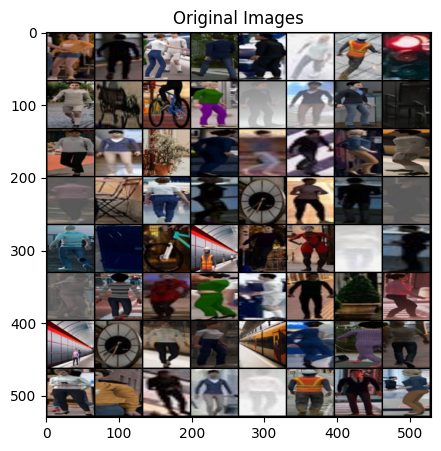

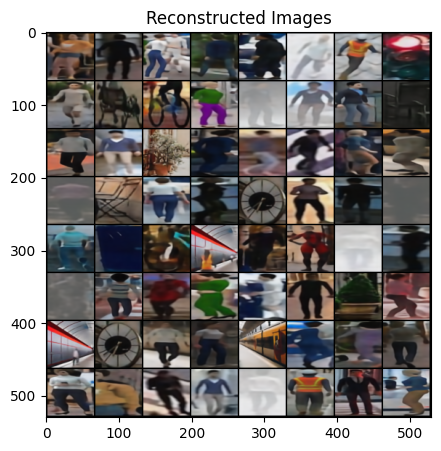

In [11]:
# Get a batch of images from your dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed_imgs = autoencoder(images)

plot_images_vs_reconstructed_images(images, reconstructed_imgs)

In [12]:
train_loss = compute_loss_on_dataloader(autoencoder, train_loader, device)
print(f"Train Loss: {train_loss}")

Train Loss: 0.004798893592240649


## End of Notebook